# Managing your contents

As a GIS matures, it gets filled with items of vairous types, properties and relationships with one another. Managing such items across various users of an org becomes an important task. In this section we observe how you can work with individual items in your contents, the properties of an item, how to delete them and how items are related to one another.

Topics covered in this page:
 * [Properties of an item](#properties-of-an-item)
  * [Updating item properties](#updating-item-properties)
 * [Downloading your items](#downloading-your-items)
 * [Deleting content](#deleting-content)
  * [Delete protection](#delete-protection)
 * [Finiding relationships between items](#finding-relationships-between-items)

<a id="properties-of-an-item"></a>
## Properties of an item
An `Item` in your GIS is rich with multiple properties. You can access them using them as properties on the `Item` object

In [1]:
#connect to GIS
from arcgis.gis import GIS
gis = GIS("http://dev003246.esri.com/portal", "arcgis_python_api", "sharing.1")

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Service owner:arcgis_python_api>
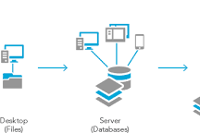

In [3]:
#access an Item
earthquakes_item = gis.content.get('7ff6299367fa4a789bae81149b7ceae9')
earthquakes_item

In [5]:
# item id
earthquakes_item.id

'7ff6299367fa4a789bae81149b7ceae9'

In [6]:
# title
earthquakes_item.title

'Earthquakes around the world from 1800s to early 1900s'

In [7]:
# tags
earthquakes_item.tags

['arcgis', 'python', 'earthquake', 'natural disaster', 'emergency']

<a id="updating-item-properties"></a>
### Updating item properties
You can update any of the `Item`s properties using the `update()` method. It accepts parameters similar to `add()` method.

In [8]:
# update the tags
earthquakes_item.update(item_properties={'tags':'python, seismometer, empirical, in-situ'})

True

In [9]:
earthquakes_item.tags

['python', 'seismometer', 'empirical', 'in-situ']

In [10]:
# updating thumbnail
earthquakes_item.update(thumbnail=r'E:\GIS_Data\file_formats\CSV\sensors2.jpg')

True

<Item title:"Earthquakes around the world from 1800s to early 1900s" type:Feature Service owner:arcgis_python_api>
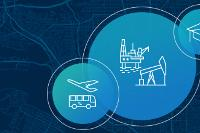

In [11]:
earthquakes_item

<a id="downloading-your-items"></a>
## Downloading your items
You can download the various parts of your items such as thumbnail, data, metadata to file system. You can use this process to archive content if you are retiring your GIS or to re-publish / migrate content from one GIS to another.

### Download item data
The `get_data()` reads the data associated with an item and returns it as a byte array. If the data is a JSON, it converts and returns as a Python dictionary, else stores it as a file in the user's temporary directory.

<Item title:"Ports along west coast" type:CSV owner:arcgis_python_api>
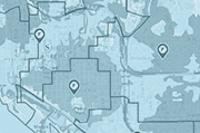

In [30]:
ports_csv_item = gis.content.get('a1623d78753a4213b1cc59790f54d15c')
ports_csv_item

In [31]:
ports_csv_item.get_data()

'C:\\Users\\atma6951\\AppData\\Local\\Temp\\ports_west_USA.csv'

### Download metadata
You can download metadata into an XML file using the `download_metadata()` method. Once you have this XML file, you can modify it as per need and and pass it to the `metadata` parameter of `update()` or `add()` when updating or creating new content.

In [27]:
ports_csv_item.download_metadata(save_folder=r'E:\temp')

### Download thumbnail
Finally, you can download the thumbnail of an item using the `download_thumbnail()` method.

In [32]:
ports_csv_item.download_thumbnail(save_folder= r'E:\temp')

'E:\\temp\\network_streets.jpg'

## Deleting content
You can delete any item using the `delete()` method of the `Item` object. When deleting a hosted layer, this operation also deletes the hosted services powering the item.

<Item title:"web map of USA states" type:Web Map owner:arcgis_python_api>
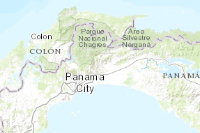

In [33]:
item_for_deletion = gis.content.get('ef6bb19c3b2043ee9a39441558ea2a24')
item_for_deletion

In [34]:
item_for_deletion.delete()

True

#### Delete protection
You can protect items from getting deleted inadvertently. Use the `protect()` of the `Item` object for this. 

In [35]:
# let us protect the ports item we accessed earlier
ports_csv_item.protect(enable = True)

{'success': True}

In [36]:
# attempting to delete will return an error
ports_csv_item.delete()

Unable to delete item. Delete protection is turned on.


RuntimeError: Unable to delete item. Delete protection is turned on.
(Error Code: 500)

As expected an exception is raised. You can disable delete protection by setting the `enable` parameter to `False`.

<a id ="finding-relationships-between-items"></a>
## Finding relationships between items
In a GIS, seldom do items exist in isolation. You typically publish new items from existing items either into a new service or as a result of performing a geoprocessing operation on the source item. You may add one or more layer items to a compose a web map or web scene item. When ever you perform such an operation, you establish a relationship between the items. These relationships represent how items in your GIS are connected to one-another. They also convey the impact of removing an item from your GIS.

The `Item` class has 3 methods with which you can determine relationships to and from an item. They are `dependent_upon()`, `dependent_to()`, `related_items()`. Let us observe how the ports csv item and the feature layer published from this item share a relationship

<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>
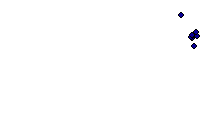

In [55]:
ports_feature_layer = gis.content.get('b0cb0c9f63e74e8480af0286eb9ac01f')
ports_feature_layer

Since we know this feature layer item is published from the csv, we can specify the `relationship_type` parameter as `Service2Data`. The direction of relationship would be `forward` as the current item is a service and we are looking for the original data used to publish it.

In [56]:
ports_feature_layer.related_items('Service2Data', 'forward')

[<Item title:"Ports along west coast" type:CSV owner:arcgis_python_api>]

On the ports csv item, the `relationship_type` remains the same whereas the direction is reversed

In [57]:
ports_csv_item.related_items('Service2Data', 'reverse')

[<Item title:"Ports along west coast" type:Feature Service owner:arcgis_python_api>]

### Relationships on web map items
Just like how data and services published out of the data share a relationship, web maps share a relationship of type `Map2Service` with the items used as web layers.

<Item title:"Los Angeles tourism stops" type:Web Map owner:arcgis_python_api>
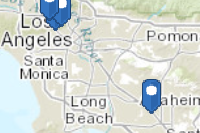

In [62]:
webmap_item = gis.content.get('cc1876f1708e494d81a93014c1f56c58')
webmap_item

Calling `dependent_upon()` method lists all forward relationships an item has. It lists all the items the current item is dependent upon. In the case of this web map, it has one operational layer dependent upon a feature collection and has a base map layer dependent upon a map service.

In [59]:
webmap_item.dependent_upon()

{'fullCount': 2,
 'list': [{'dependencyType': 'id', 'id': '31ad8b9a8ed3461992607eb8309816e2'},
  {'dependencyType': 'url',
   'url': 'http://services.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer'}],
 'nextStart': 1,
 'num': 2,
 'start': 1,
 'total': 2}

Calling `dependent_to()` lists the items which are dependent upon this web map item

In [63]:
webmap_item.dependent_to()

{'fullCount': 0, 'list': [], 'nextStart': 1, 'num': 0, 'start': 1, 'total': 0}

### Adding relationships
It is beneficial to add a relationship to establish how information flows from one item to another across a GIS. In the web map example above, the map is dependent upon 2 other items. However the dependency type is listed as `id` instead of `Map2FeatureCollection`. We can change that by adding a new relationship.

You can add a relationship by using the `add_relationship()` method and passing it the item to which the current item is realted to and the type of relationship.

<Item title:"LA_tourism_stops" type:Feature Collection owner:arcgis_python_api>
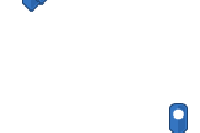

In [66]:
#from the example above, use the item id of first relationship to get the related item
webmap_related_item = gis.content.get('31ad8b9a8ed3461992607eb8309816e2')
webmap_related_item

In [67]:
# add a relationship
webmap_item.add_relationship(rel_item= webmap_related_item, rel_type= 'Map2FeatureCollection')

True

Now that a relationship is added, this property is reflected not only on the web map item, but also on the feature collection item. Thus if you query `dependent_to()` method on the feature collection item, you would get the item id of the web map item.

In [71]:
webmap_related_item.dependent_to()

{'fullCount': 1,
 'list': [{'dependencyType': 'id', 'id': 'cc1876f1708e494d81a93014c1f56c58'}],
 'nextStart': 1,
 'num': 1,
 'start': 1,
 'total': 1}

After the update, querying for related items on the web map item promptly returns the feaure collection item.

In [72]:
webmap_item.related_items('Map2FeatureCollection', 'forward')

[<Item title:"LA_tourism_stops" type:Feature Collection owner:arcgis_python_api>]

### Deleting relationships
You can remove defunct relationships by calling the `delete_relationship()` method and passing the relationship type and related item.